Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


## BANK DATA

In [3]:
bank = pd.read_csv('book.csv')
bank

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
bank.shape

(2000, 11)

### Apriori Algorithm
#### 1.Association rules with 15% Support and 40% Confidence

In [6]:
freequent_itemsets = apriori(bank, min_support=0.15, use_colnames=True)
freequent_itemsets

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [7]:
rules = association_rules(freequent_itemsets, metric='confidence', min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(DoItYBks),0.4230,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
4,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
8,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
9,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105


In [8]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
8,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
15,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
13,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
10,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
9,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
4,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347


In [9]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(DoItYBks),0.4230,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
4,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
8,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
9,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105


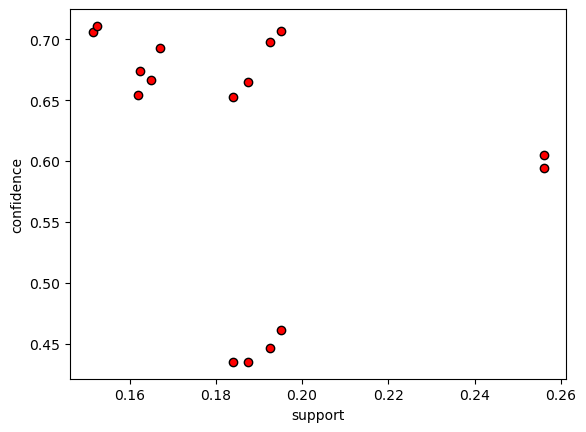

In [10]:
plt.scatter(rules['support'], rules['confidence'], c='r', edgecolors='black')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### 2.Association rules with 10% Support and 70% confidence

In [11]:
freequnt_itemset1 = apriori(bank, min_support=0.10, use_colnames=True)
freequnt_itemset1

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [12]:
rules1 = association_rules(freequnt_itemset1, metric='confidence', min_threshold=0.7)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
7,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
9,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083


In [13]:
rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
16,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
17,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
9,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
15,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000
18,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
14,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158


In [14]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
7,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
9,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083


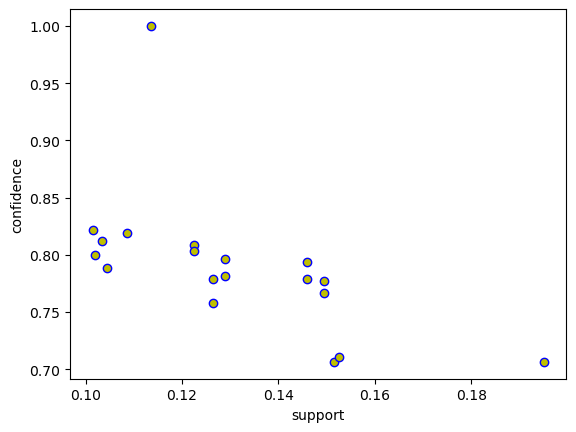

In [15]:
# visualization of obtained rule
plt.scatter(rules1['support'],rules1['confidence'],c='y', edgecolors='b')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

## MY_MOVIES

In [16]:
movies = pd.read_csv('my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [17]:
mv2 = movies.iloc[:,5:]
mv2.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [18]:
mv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [19]:
mv2.shape

(10, 10)

### Apriori Algorithm
#### 1.Association rules with 15% Support and 70% Confidence

In [20]:
freequent_itemsets_mv = apriori(mv2, min_support=0.15, use_colnames=True)
freequent_itemsets_mv

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [21]:
rules_mv = association_rules(freequent_itemsets_mv, metric='confidence', min_threshold=0.7)
rules_mv

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
8,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [22]:
rules_mv.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
8,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


In [23]:
rules_mv[rules_mv.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
8,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


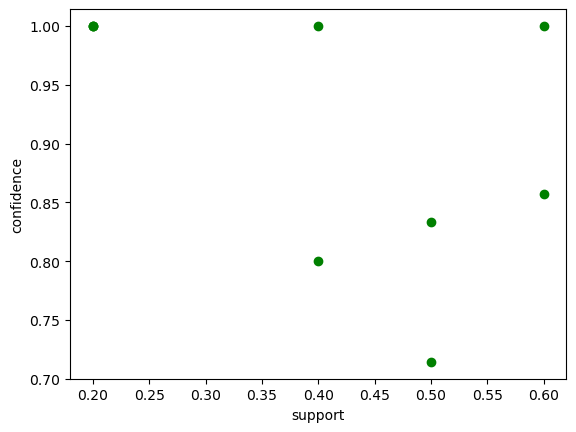

In [24]:
# visualization of obtained rule
plt.scatter(rules_mv['support'],rules_mv['confidence'],c='g')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### 2.Association rules with 25% support and confidence 80%

In [25]:
frequent_itemsets_mv1=apriori(mv2,min_support=0.25,use_colnames=True)
frequent_itemsets_mv1

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Patriot, Gladiator, Sixth Sense)"


In [26]:
rules_mv1 = association_rules(frequent_itemsets_mv1, metric="confidence", min_threshold=0.80)

rules_mv1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
4,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [27]:
rules_mv1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
4,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8


In [28]:
rules_mv1[rules_mv1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
4,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


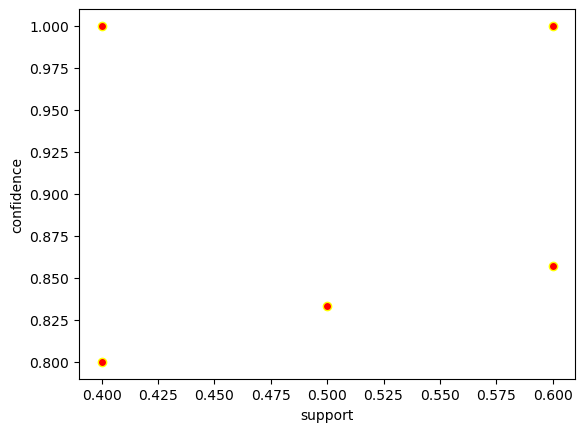

In [29]:
# visualization of obtained rule
plt.scatter(rules_mv1['support'],rules_mv1['confidence'],c='r',edgecolor='yellow')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### 3.Association rules with 20% support and lift is 1.2

In [30]:
frequent_itemsets_mv2=apriori(mv2,min_support=0.20,use_colnames=True)
frequent_itemsets_mv2

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [33]:
rules_mv2 = association_rules(frequent_itemsets_mv2, metric="lift", min_threshold=1.2)

rules_mv2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
1,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


In [34]:
rules_mv2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
1,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
7,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [35]:
rules_mv2[rules_mv2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
1,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


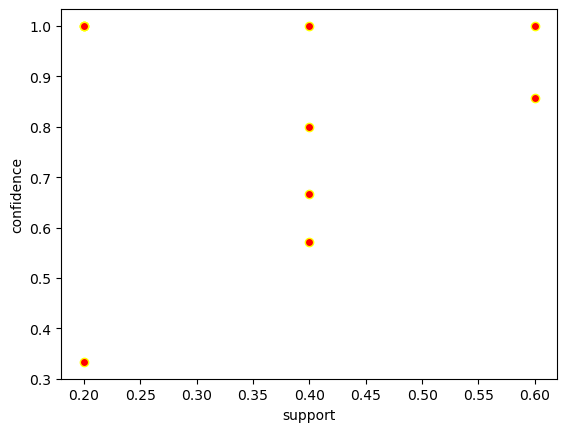

In [36]:
# visualization of obtained rule
plt.scatter(rules_mv2['support'],rules_mv2['confidence'],c='r',edgecolor='yellow')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()